In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epoch = 100
learning_rate = 0.01
batch_size = 4

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor()]
)
train_dataset = torchvision.datasets.MNIST(root='../data/', train=True,
                                           transform=transform, download=False)
test_dataset = torchvision.datasets.MNIST(root='../data/', train=False,
                                           transform=transform, download=False)
train_loader= torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader= torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [5]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1= nn.Conv2d(1,16,3,1)
        self.conv2 = nn.Conv2d(16,32,3,1)
        self.fc1 = nn.Linear(32*5*5,64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

In [6]:
model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [15]:

def train(model, loader, optimizer, criterion, epochs = 5):
    train_losses = []
    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for data, target in loader:
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    plt.plot(train_losses)
    plt.title("Training Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

        
        

Epoch 1, Loss: 0.3284
Epoch 2, Loss: 0.3333
Epoch 3, Loss: 0.3327
Epoch 4, Loss: 0.3312
Epoch 5, Loss: 0.3281


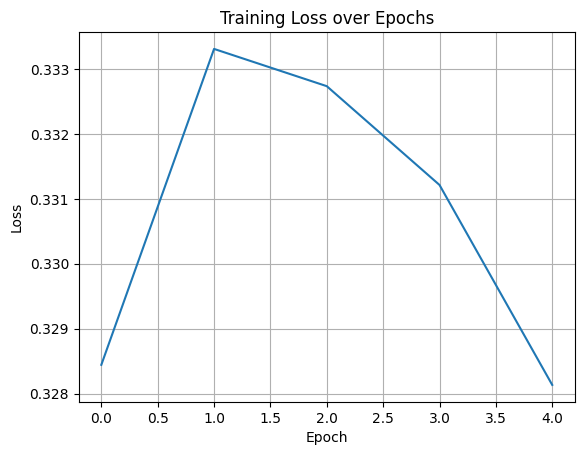

In [16]:
train(model, train_loader, optimizer, criterion)

In [12]:
correct = 0
total = 0
model.eval()  # chuyển model sang chế độ đánh giá (deactivate dropout, batchnorm,...)
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 90.13%


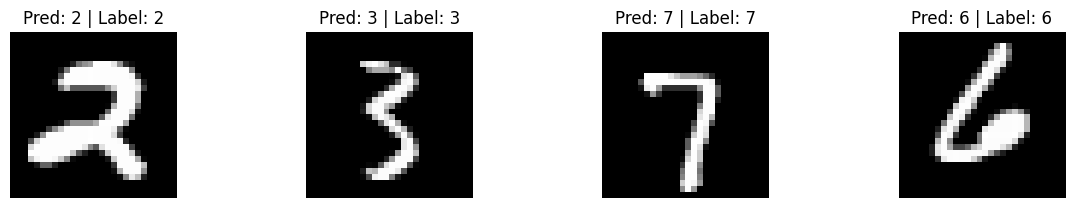

In [14]:
model.eval()
with torch.no_grad():
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    num_images = min(len(images), 8)  # lấy tối đa 8 ảnh, hoặc ít hơn nếu không đủ

    plt.figure(figsize=(12, 4))
    for i in range(num_images):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i][0], cmap='gray')
        plt.title(f'Pred: {preds[i].item()} | Label: {labels[i].item()}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
